# TMNLP Assignment in Python

BACKGROUND:

The given data contains short and crisp movie reviews by various critics.



In [ ]:
# Libraries
import pandas as pd
import seaborn as sns

import nltk
nltk.download('vader_lexicon')
nltk.download('punkt_tab')
nltk.download('stopwords')

import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from collections import Counter

In [ ]:
# @title Import Textdata. Do the essential cleaning of the data

with open('/content/Textdata.txt', 'r') as file:
    lines = file.readlines()

# Convert to DataFrame
df = pd.DataFrame(lines, columns=['Review'])


# Preprocessing function
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()

    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenize the text
    tokens = word_tokenize(text)

    # Get a set of NLTK English stopwords
    stop_words = set(stopwords.words('english'))

    # Remove English stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # Join the tokens back into a sentence
    cleaned_text = ' '.join(tokens)

    return cleaned_text

# Apply preprocessing to the "Review" column
df['Cleaned_Review'] = df['Review'].apply(preprocess_text)

print(df['Review'][0])
print(df['Cleaned_Review'][0])

films adapted from comic books have had plenty of success , whether they're about superheroes ( batman , superman , spawn ) , or geared toward kids ( casper ) or the arthouse crowd ( ghost world ) , but there's never really been a comic book like from hell before . 

films adapted comic books plenty success whether theyre superheroes batman superman spawn geared toward kids casper arthouse crowd ghost world theres never really comic book like hell


In [ ]:
# @title Find top 20 words sorted by frequency

# Combine all cleaned reviews into one large string
all_words = ' '.join(df['Cleaned_Review']).split()

# Count word frequencies
all_word_freq = Counter(all_words)

# top 20 most frequent words
top_20_words = all_word_freq.most_common(20)

print("Top 20 Words by Frequency:")
for word, freq in top_20_words:
    print(f"{word}: {freq}")

Top 20 Words by Frequency:
film: 10
like: 7
dont: 7
make: 7
even: 6
movie: 6
comic: 5
get: 5
pretty: 5
films: 4
world: 4
really: 4
say: 4
little: 4
good: 4
see: 4
one: 4
teen: 4
book: 3
moore: 3


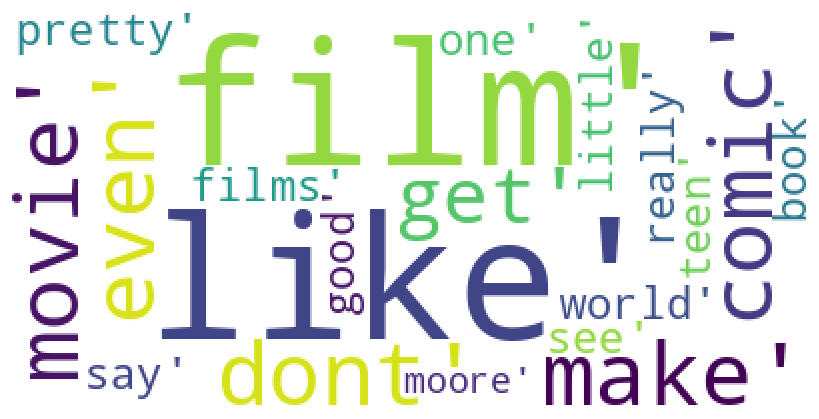

In [ ]:
# @title Create a wordcloud using the given data

wordcloud = WordCloud(background_color="white").generate(str(top_20_words))
plt.figure(figsize = (8, 8))
plt.imshow(wordcloud); plt.axis("off")
plt.tight_layout(pad = 0); plt.show()

In [ ]:
# @title List the number of lines having sentiments ‘Negative',  'Neutral’ and ‘Positive’

# Initialize SentimentIntensityAnalyzer for sentiment analysis
sid = SentimentIntensityAnalyzer()

df['Sentiment_scores'] = df['Cleaned_Review'].apply(lambda x: sid.polarity_scores(x))

df['Sentiment'] = df['Sentiment_scores'].apply(lambda x: 'Positive' if x['compound'] > 0.05 else ('Negative' if x['compound'] < -0.05 else 'Neutral'))
sentiment_counts = df['Sentiment'].value_counts()

sentiment_counts

,count
Sentiment,
Negative,21
Positive,21
Neutral,19


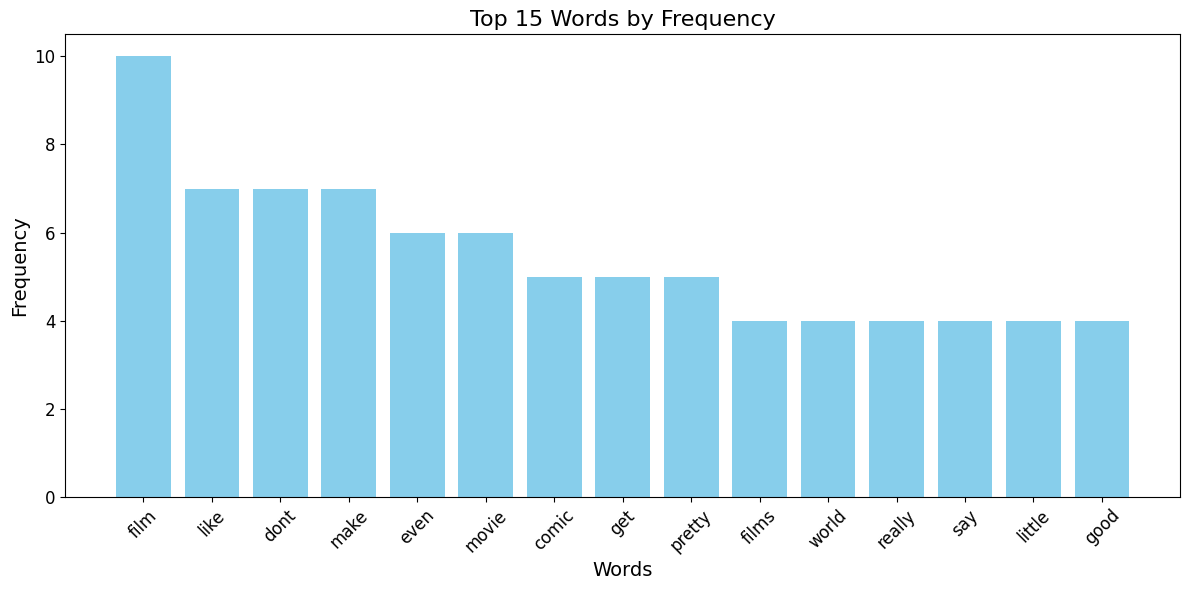

In [ ]:
# @title Plot bar graph showing top 15 words by frequency
top_15_words = all_word_freq.most_common(15)
top_15_words

words = [index[0] for index in top_15_words]
frequencies = [index[1] for index in top_15_words]

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(words, frequencies, color='skyblue')
plt.xlabel("Words", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Top 15 Words by Frequency", fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()